In [1]:
!pip install pandas numpy openpyxl
print("✅ Dependencies installed successfully!")

✅ Dependencies installed successfully!


In [2]:
import pandas as pd
import numpy as np
from datetime import datetime
import warnings
import os
warnings.filterwarnings('ignore')

print("✅ Libraries imported successfully!")
print(f"Python version: {pd.__version__}")

✅ Libraries imported successfully!
Python version: 2.2.3


In [3]:
# Load the dataset
file_path = 'India_Tourism_2025.xlsx'

print("Loading data...")
df = pd.read_excel(file_path)

print("✅ Dataset loaded successfully!")
print(f"\nDataset Shape: {df.shape}")
print(f"Total Records: {len(df)}")
print(f"Total Columns: {len(df.columns)}")
print(f"\nColumn Names:")
for col in df.columns:
    print(f"  - {col}")

Loading data...
✅ Dataset loaded successfully!

Dataset Shape: (432, 8)
Total Records: 432
Total Columns: 8

Column Names:
  - Month
  - State
  - Domestic Tourists
  - Foreign Tourists
  - Total Tourists
  - Tourism Revenue (INR Crore)
  - Purpose of Visit
  - Growth % (Approx.)


In [4]:
# Display first few rows
print("First 5 rows of data:")
print(df.head())

print("\n" + "="*80)
print("Data Types:")
print(df.dtypes)

First 5 rows of data:
     Month              State  Domestic Tourists  Foreign Tourists  \
0  January     Andhra Pradesh            4860784             66573   
1  January  Arunachal Pradesh            4952209            141398   
2  January              Assam            3593091            197765   
3  January              Bihar            4679021             79019   
4  January       Chhattisgarh            3790213            113374   

   Total Tourists  Tourism Revenue (INR Crore) Purpose of Visit  \
0         4927357                        48.18        Adventure   
1         5093607                        67.77          Leisure   
2         3790856                        68.05         Business   
3         4758040                        83.00        Religious   
4         3903587                        32.73        Adventure   

   Growth % (Approx.)  
0                3.84  
1               12.38  
2               10.17  
3               -4.07  
4                3.44  

Data Type

In [5]:
#data cleaning - validate data types

print("=" * 80)
print("STEP 1.1: DATA CLEANING")
print("=" * 80)

print("\n1. Validating Data Types...")

# Ensure correct data types
df['Domestic Tourists'] = df['Domestic Tourists'].astype('int64')
df['Foreign Tourists'] = df['Foreign Tourists'].astype('int64')
df['Total Tourists'] = df['Total Tourists'].astype('int64')
df['Tourism Revenue (INR Crore)'] = df['Tourism Revenue (INR Crore)'].astype('float64')
df['Growth % (Approx.)'] = df['Growth % (Approx.)'].astype('float64')

print("✅ Data types validated and corrected")
print("\nCurrent Data Types:")
print(df.dtypes)

STEP 1.1: DATA CLEANING

1. Validating Data Types...
✅ Data types validated and corrected

Current Data Types:
Month                           object
State                           object
Domestic Tourists                int64
Foreign Tourists                 int64
Total Tourists                   int64
Tourism Revenue (INR Crore)    float64
Purpose of Visit                object
Growth % (Approx.)             float64
dtype: object


In [6]:
#data cleaning - standardising dates

print("\n2. Standardizing Dates...")

# Convert Month names to datetime objects
month_mapping = {
    'January': 1, 'February': 2, 'March': 3, 'April': 4,
    'May': 5, 'June': 6, 'July': 7, 'August': 8,
    'September': 9, 'October': 10, 'November': 11, 'December': 12
}

df['Month_Number'] = df['Month'].map(month_mapping)
df['Date'] = pd.to_datetime(df['Month_Number'].astype(str) + '-2025', format='%m-%Y')

print("✅ Dates standardized to YYYY-MM-DD format")
print("\nDate Conversion Preview:")
print(df[['Month', 'Month_Number', 'Date']].head(10))


2. Standardizing Dates...
✅ Dates standardized to YYYY-MM-DD format

Date Conversion Preview:
     Month  Month_Number       Date
0  January             1 2025-01-01
1  January             1 2025-01-01
2  January             1 2025-01-01
3  January             1 2025-01-01
4  January             1 2025-01-01
5  January             1 2025-01-01
6  January             1 2025-01-01
7  January             1 2025-01-01
8  January             1 2025-01-01
9  January             1 2025-01-01


In [7]:
#data cleaning - check missing values 

print("\n3. Checking for Missing Values...")

# Check for missing values
missing_values = df.isnull().sum()
print("\nMissing Values Count:")
print(missing_values)

total_missing = missing_values.sum()
if total_missing == 0:
    print("\n✅ No missing values detected - Data is clean!")
else:
    print(f"\n⚠️ Warning: {total_missing} missing values found!")
    print("\nColumns with missing values:")
    print(missing_values[missing_values > 0])


3. Checking for Missing Values...

Missing Values Count:
Month                          0
State                          0
Domestic Tourists              0
Foreign Tourists               0
Total Tourists                 0
Tourism Revenue (INR Crore)    0
Purpose of Visit               0
Growth % (Approx.)             0
Month_Number                   0
Date                           0
dtype: int64

✅ No missing values detected - Data is clean!


In [8]:
#feature engineering - revenue per tourist (RPT)

print("\n" + "=" * 80)
print("STEP 1.2: FEATURE ENGINEERING")
print("=" * 80)

print("\n1. Creating Revenue Per Tourist (RPT)...")

# Calculate Revenue Per Tourist
df['Revenue_Per_Tourist_Crore'] = df['Tourism Revenue (INR Crore)'] / df['Total Tourists']
df['Revenue_Per_Tourist_INR'] = (df['Tourism Revenue (INR Crore)'] * 10000000) / df['Total Tourists']

print("✅ RPT calculated successfully")
print("\nFormula: RPT = Tourism Revenue / Total Tourists")
print("\nSample Results (First 10 rows):")
print(df[['State', 'Month', 'Total Tourists', 'Tourism Revenue (INR Crore)', 
          'Revenue_Per_Tourist_INR']].head(10))


STEP 1.2: FEATURE ENGINEERING

1. Creating Revenue Per Tourist (RPT)...
✅ RPT calculated successfully

Formula: RPT = Tourism Revenue / Total Tourists

Sample Results (First 10 rows):
               State    Month  Total Tourists  Tourism Revenue (INR Crore)  \
0     Andhra Pradesh  January         4927357                        48.18   
1  Arunachal Pradesh  January         5093607                        67.77   
2              Assam  January         3790856                        68.05   
3              Bihar  January         4758040                        83.00   
4       Chhattisgarh  January         3903587                        32.73   
5                Goa  January         3382372                        60.65   
6            Gujarat  January          908390                        13.00   
7            Haryana  January         3094642                        33.13   
8   Himachal Pradesh  January          117032                         2.79   
9          Jharkhand  January      

In [9]:
#feature engineering - Domestic vs Foreign Revenue Split

print("\n2. Estimating Domestic vs. Foreign Revenue Split...")

# Using 4x multiplier (foreign tourists spend 4x more than domestic)
foreign_multiplier = 4

print(f"   Using multiplier: {foreign_multiplier}x (Foreign tourists spend {foreign_multiplier}x more)")
print("   Algorithm: Total Revenue = (Dom_Vol × X) + (For_Vol × 4X)")

# Calculate per-person spend
df['Domestic_Spend_Per_Person_Crore'] = df['Tourism Revenue (INR Crore)'] / \
                                         (df['Domestic Tourists'] + foreign_multiplier * df['Foreign Tourists'])

df['Foreign_Spend_Per_Person_Crore'] = df['Domestic_Spend_Per_Person_Crore'] * foreign_multiplier

# Calculate total revenues
df['Est_Domestic_Revenue_Crore'] = df['Domestic Tourists'] * df['Domestic_Spend_Per_Person_Crore']
df['Est_Foreign_Revenue_Crore'] = df['Foreign Tourists'] * df['Foreign_Spend_Per_Person_Crore']

# Calculate percentage splits
df['Domestic_Revenue_Percent'] = (df['Est_Domestic_Revenue_Crore'] / df['Tourism Revenue (INR Crore)']) * 100
df['Foreign_Revenue_Percent'] = (df['Est_Foreign_Revenue_Crore'] / df['Tourism Revenue (INR Crore)']) * 100

# Verify calculations
df['Revenue_Verification'] = df['Est_Domestic_Revenue_Crore'] + df['Est_Foreign_Revenue_Crore']
max_error = abs(df['Tourism Revenue (INR Crore)'] - df['Revenue_Verification']).max()

print("✅ Revenue split calculated successfully")
print(f"✅ Verification: Max error = {max_error:.10f} crores (floating point precision)")

print("\nSample Results (First 10 rows):")
print(df[['State', 'Month', 'Domestic Tourists', 'Foreign Tourists',
          'Est_Domestic_Revenue_Crore', 'Est_Foreign_Revenue_Crore',
          'Domestic_Revenue_Percent', 'Foreign_Revenue_Percent']].head(10))


2. Estimating Domestic vs. Foreign Revenue Split...
   Using multiplier: 4x (Foreign tourists spend 4x more)
   Algorithm: Total Revenue = (Dom_Vol × X) + (For_Vol × 4X)
✅ Revenue split calculated successfully
✅ Verification: Max error = 0.0000000000 crores (floating point precision)

Sample Results (First 10 rows):
               State    Month  Domestic Tourists  Foreign Tourists  \
0     Andhra Pradesh  January            4860784             66573   
1  Arunachal Pradesh  January            4952209            141398   
2              Assam  January            3593091            197765   
3              Bihar  January            4679021             79019   
4       Chhattisgarh  January            3790213            113374   
5                Goa  January            3281237            101135   
6            Gujarat  January             738767            169623   
7            Haryana  January            2999923             94719   
8   Himachal Pradesh  January              96657   

In [10]:
#Feature Engineering - Seasonality Index

print("\n3. Calculating Seasonality Index...")

# Calculate annual average revenue for each state
state_annual_avg = df.groupby('State')['Tourism Revenue (INR Crore)'].mean().reset_index()
state_annual_avg.columns = ['State', 'Annual_Avg_Revenue']

print("Annual Average Revenue by State (First 10):")
print(state_annual_avg.head(10))

# Merge back to original dataframe
df = df.merge(state_annual_avg, on='State', how='left')

# Calculate Seasonality Index
df['Seasonality_Index'] = ((df['Tourism Revenue (INR Crore)'] - df['Annual_Avg_Revenue']) / 
                           df['Annual_Avg_Revenue']) * 100

# Calculate Seasonality Ratio
df['Seasonality_Ratio'] = df['Tourism Revenue (INR Crore)'] / df['Annual_Avg_Revenue']

print("\n✅ Seasonality Index calculated successfully")
print("\nInterpretation:")
print("  - Seasonality Index > 0:  Peak season (above average)")
print("  - Seasonality Index < 0:  Off-season (below average)")
print("  - Seasonality Ratio > 1:  Above average performance")
print("  - Seasonality Ratio < 1:  Below average performance")

print("\nSample Results (First 10 rows):")
print(df[['State', 'Month', 'Tourism Revenue (INR Crore)', 'Annual_Avg_Revenue',
          'Seasonality_Index', 'Seasonality_Ratio']].head(10))


3. Calculating Seasonality Index...
Annual Average Revenue by State (First 10):
                       State  Annual_Avg_Revenue
0  Andaman & Nicobar Islands           38.975000
1             Andhra Pradesh           45.065000
2          Arunachal Pradesh           39.034167
3                      Assam           47.115000
4                      Bihar           46.708333
5                 Chandigarh           47.320000
6               Chhattisgarh           34.000000
7                Daman & Diu           37.480833
8                      Delhi           50.538333
9                        Goa           39.230833

✅ Seasonality Index calculated successfully

Interpretation:
  - Seasonality Index > 0:  Peak season (above average)
  - Seasonality Index < 0:  Off-season (below average)
  - Seasonality Ratio > 1:  Above average performance
  - Seasonality Ratio < 1:  Below average performance

Sample Results (First 10 rows):
               State    Month  Tourism Revenue (INR Crore)  \
0   

In [11]:
#creating Final dataset

print("\n" + "=" * 80)
print("CREATING FINAL DATASET")
print("=" * 80)

# Select columns for final output
final_columns = [
    'State',
    'Month',
    'Date',
    'Month_Number',
    'Domestic Tourists',
    'Foreign Tourists',
    'Total Tourists',
    'Tourism Revenue (INR Crore)',
    'Revenue_Per_Tourist_INR',
    'Domestic_Spend_Per_Person_Crore',
    'Foreign_Spend_Per_Person_Crore',
    'Est_Domestic_Revenue_Crore',
    'Est_Foreign_Revenue_Crore',
    'Domestic_Revenue_Percent',
    'Foreign_Revenue_Percent',
    'Annual_Avg_Revenue',
    'Seasonality_Index',
    'Seasonality_Ratio',
    'Purpose of Visit',
    'Growth % (Approx.)'
]

df_final = df[final_columns].copy()

# Sort by state and month
df_final = df_final.sort_values(['State', 'Month_Number']).reset_index(drop=True)

print("✅ Final dataset created successfully!")
print(f"\nFinal Dataset Shape: {df_final.shape}")
print(f"Total Rows: {len(df_final)}")
print(f"Total Columns: {len(df_final.columns)}")
print(f"\nColumn Names:")
for i, col in enumerate(df_final.columns, 1):
    print(f"  {i}. {col}")


CREATING FINAL DATASET
✅ Final dataset created successfully!

Final Dataset Shape: (432, 20)
Total Rows: 432
Total Columns: 20

Column Names:
  1. State
  2. Month
  3. Date
  4. Month_Number
  5. Domestic Tourists
  6. Foreign Tourists
  7. Total Tourists
  8. Tourism Revenue (INR Crore)
  9. Revenue_Per_Tourist_INR
  10. Domestic_Spend_Per_Person_Crore
  11. Foreign_Spend_Per_Person_Crore
  12. Est_Domestic_Revenue_Crore
  13. Est_Foreign_Revenue_Crore
  14. Domestic_Revenue_Percent
  15. Foreign_Revenue_Percent
  16. Annual_Avg_Revenue
  17. Seasonality_Index
  18. Seasonality_Ratio
  19. Purpose of Visit
  20. Growth % (Approx.)


In [12]:
# Save to CSV in the same directory
output_file = 'India_Tourism_2025_Processed.csv'
output_path = os.path.join(os.getcwd(), output_file)

df_final.to_csv(output_file, index=False)

print("=" * 80)
print("SAVING OUTPUT")
print("=" * 80)
print(f"\n✅ Data saved successfully!")
print(f"   File: {output_file}")
print(f"   Location: {output_path}")
print(f"   Total Rows: {len(df_final)}")
print(f"   Total Columns: {len(df_final.columns)}")

# Verify file was created
if os.path.exists(output_file):
    file_size = os.path.getsize(output_file)
    print(f"   File Size: {file_size:,} bytes ({file_size/1024:.2f} KB)")
    print("\n✅ File created successfully in your project directory!")
else:
    print("\n❌ Error: File was not created")

SAVING OUTPUT

✅ Data saved successfully!
   File: India_Tourism_2025_Processed.csv
   Location: C:\Users\aishw\Data Analytics Projects\Tourism Project\India_Tourism_2025_Processed.csv
   Total Rows: 432
   Total Columns: 20
   File Size: 114,226 bytes (111.55 KB)

✅ File created successfully in your project directory!


In [13]:
print("=" * 80)
print("FINAL RESULTS - PREVIEW")
print("=" * 80)

print("\nFirst 10 rows of processed data:")
print(df_final.head(10))

print("\nLast 10 rows of processed data:")
print(df_final.tail(10))

FINAL RESULTS - PREVIEW

First 10 rows of processed data:
                       State      Month       Date  Month_Number  \
0  Andaman & Nicobar Islands    January 2025-01-01             1   
1  Andaman & Nicobar Islands   February 2025-02-01             2   
2  Andaman & Nicobar Islands      March 2025-03-01             3   
3  Andaman & Nicobar Islands      April 2025-04-01             4   
4  Andaman & Nicobar Islands        May 2025-05-01             5   
5  Andaman & Nicobar Islands       June 2025-06-01             6   
6  Andaman & Nicobar Islands       July 2025-07-01             7   
7  Andaman & Nicobar Islands     August 2025-08-01             8   
8  Andaman & Nicobar Islands  September 2025-09-01             9   
9  Andaman & Nicobar Islands    October 2025-10-01            10   

   Domestic Tourists  Foreign Tourists  Total Tourists  \
0            2539148             68865         2608013   
1            4187930             44980         4232910   
2             14933

In [14]:
print("\n" + "=" * 80)
print("SUMMARY STATISTICS")
print("=" * 80)

print("\n1. Overall Statistics:")
print(f"   Total States/UTs: {df_final['State'].nunique()}")
print(f"   Total Months: {df_final['Month'].nunique()}")
print(f"   Total Records: {len(df_final)}")

print("\n2. Tourism Volume:")
print(f"   Total Domestic Tourists: {df_final['Domestic Tourists'].sum():,}")
print(f"   Total Foreign Tourists: {df_final['Foreign Tourists'].sum():,}")
print(f"   Total Tourists: {df_final['Total Tourists'].sum():,}")
print(f"   Average Tourists per Month: {df_final['Total Tourists'].mean():,.0f}")

print("\n3. Revenue Statistics:")
print(f"   Total Revenue: ₹{df_final['Tourism Revenue (INR Crore)'].sum():.2f} Crore")
print(f"   Average Monthly Revenue: ₹{df_final['Tourism Revenue (INR Crore)'].mean():.2f} Crore")
print(f"   Est. Domestic Revenue: ₹{df_final['Est_Domestic_Revenue_Crore'].sum():.2f} Crore")
print(f"   Est. Foreign Revenue: ₹{df_final['Est_Foreign_Revenue_Crore'].sum():.2f} Crore")

print("\n4. Revenue Split (Overall Average):")
print(f"   Domestic Revenue: {df_final['Domestic_Revenue_Percent'].mean():.2f}%")
print(f"   Foreign Revenue: {df_final['Foreign_Revenue_Percent'].mean():.2f}%")

print("\n5. Revenue Per Tourist:")
print(f"   Average: ₹{df_final['Revenue_Per_Tourist_INR'].mean():.2f}")
print(f"   Minimum: ₹{df_final['Revenue_Per_Tourist_INR'].min():.2f}")
print(f"   Maximum: ₹{df_final['Revenue_Per_Tourist_INR'].max():.2f}")


SUMMARY STATISTICS

1. Overall Statistics:
   Total States/UTs: 36
   Total Months: 12
   Total Records: 432

2. Tourism Volume:
   Total Domestic Tourists: 1,072,449,093
   Total Foreign Tourists: 42,678,602
   Total Tourists: 1,115,127,695
   Average Tourists per Month: 2,581,314

3. Revenue Statistics:
   Total Revenue: ₹17077.28 Crore
   Average Monthly Revenue: ₹39.53 Crore
   Est. Domestic Revenue: ₹14893.22 Crore
   Est. Foreign Revenue: ₹2184.06 Crore

4. Revenue Split (Overall Average):
   Domestic Revenue: 80.59%
   Foreign Revenue: 19.41%

5. Revenue Per Tourist:
   Average: ₹154.19
   Minimum: ₹51.44
   Maximum: ₹249.97


In [15]:
print("\nDescriptive Statistics for Key Metrics:")
print("\n" + "-" * 80)
print(df_final[['Domestic Tourists', 'Foreign Tourists', 'Total Tourists', 
                'Tourism Revenue (INR Crore)', 'Revenue_Per_Tourist_INR',
                'Seasonality_Index']].describe())


Descriptive Statistics for Key Metrics:

--------------------------------------------------------------------------------
       Domestic Tourists  Foreign Tourists  Total Tourists  \
count       4.320000e+02        432.000000    4.320000e+02   
mean        2.482521e+06      98793.060185    2.581314e+06   
std         1.456601e+06      55786.810484    1.458875e+06   
min         6.096100e+04       1284.000000    1.003880e+05   
25%         1.129177e+06      50432.250000    1.204057e+06   
50%         2.539010e+06      96418.500000    2.622439e+06   
75%         3.759052e+06     143211.250000    3.882286e+06   
max         4.985328e+06     199461.000000    5.164564e+06   

       Tourism Revenue (INR Crore)  Revenue_Per_Tourist_INR  Seasonality_Index  
count                   432.000000               432.000000       4.320000e+02  
mean                     39.530741               154.192631      -4.605370e-16  
std                      27.933304                57.060765       6.864483e

In [16]:
print("\n" + "=" * 80)
print("TOP 10 STATES BY TOTAL REVENUE")
print("=" * 80)

revenue_by_state = df_final.groupby('State')['Tourism Revenue (INR Crore)'].sum().sort_values(ascending=False)

print("\nTop 10 States:")
for i, (state, revenue) in enumerate(revenue_by_state.head(10).items(), 1):
    print(f"   {i}. {state:<30} ₹{revenue:>10.2f} Crore")

print("\nBottom 10 States:")
for i, (state, revenue) in enumerate(revenue_by_state.tail(10).items(), 1):
    print(f"   {i}. {state:<30} ₹{revenue:>10.2f} Crore")


TOP 10 STATES BY TOTAL REVENUE

Top 10 States:
   1. Haryana                        ₹    632.85 Crore
   2. Tamil Nadu                     ₹    630.22 Crore
   3. Delhi                          ₹    606.46 Crore
   4. Odisha                         ₹    605.57 Crore
   5. Maharashtra                    ₹    568.28 Crore
   6. Chandigarh                     ₹    567.84 Crore
   7. Assam                          ₹    565.38 Crore
   8. Bihar                          ₹    560.50 Crore
   9. Andhra Pradesh                 ₹    540.78 Crore
   10. Rajasthan                      ₹    533.29 Crore

Bottom 10 States:
   1. Uttar Pradesh                  ₹    413.36 Crore
   2. Himachal Pradesh               ₹    410.72 Crore
   3. Chhattisgarh                   ₹    408.00 Crore
   4. Gujarat                        ₹    406.86 Crore
   5. Jammu & Kashmir                ₹    403.54 Crore
   6. Manipur                        ₹    401.03 Crore
   7. Kerala                         ₹    398.20 Cro

In [17]:
print("\n" + "=" * 80)
print("REVENUE SPLIT ANALYSIS (Top 10 States)")
print("=" * 80)

# Average revenue split by state
revenue_split = df_final.groupby('State')[['Domestic_Revenue_Percent', 
                                             'Foreign_Revenue_Percent']].mean()
revenue_split['Total_Revenue'] = df_final.groupby('State')['Tourism Revenue (INR Crore)'].sum()
revenue_split = revenue_split.sort_values('Total_Revenue', ascending=False)

print("\nTop 10 States - Domestic vs Foreign Revenue Split:")
print(revenue_split.head(10))


REVENUE SPLIT ANALYSIS (Top 10 States)

Top 10 States - Domestic vs Foreign Revenue Split:
                Domestic_Revenue_Percent  Foreign_Revenue_Percent  \
State                                                               
Haryana                        86.910873                13.089127   
Tamil Nadu                     82.861075                17.138925   
Delhi                          88.352154                11.647846   
Odisha                         91.105358                 8.894642   
Maharashtra                    75.561721                24.438279   
Chandigarh                     80.559660                19.440340   
Assam                          83.761385                16.238615   
Bihar                          83.282354                16.717646   
Andhra Pradesh                 83.055139                16.944861   
Rajasthan                      88.378191                11.621809   

                Total_Revenue  
State                          
Haryana        

In [18]:
print("\n" + "=" * 80)
print("SEASONALITY ANALYSIS")
print("=" * 80)

# Average seasonality by month
seasonality_by_month = df_final.groupby('Month')['Seasonality_Index'].mean()

# Reorder by month number
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']
seasonality_by_month = seasonality_by_month.reindex(month_order)

print("\nAverage Seasonality Index by Month:")
for month, index in seasonality_by_month.items():
    status = "PEAK" if index > 20 else "OFF" if index < -20 else "NORMAL"
    print(f"   {month:<12} {index:>8.2f}%  [{status}]")


SEASONALITY ANALYSIS

Average Seasonality Index by Month:
   January          3.72%  [NORMAL]
   February       -21.73%  [OFF]
   March            4.04%  [NORMAL]
   April          -16.10%  [NORMAL]
   May             -5.30%  [NORMAL]
   June             4.18%  [NORMAL]
   July             5.59%  [NORMAL]
   August          -0.43%  [NORMAL]
   September       11.66%  [NORMAL]
   October          1.19%  [NORMAL]
   November        27.59%  [PEAK]
   December       -14.37%  [NORMAL]


In [19]:
print("\n" + "=" * 80)
print("PEAK SEASON IDENTIFICATION")
print("=" * 80)

# Find peak seasons for each state
print("\nTop 5 Peak Season Records (Highest Seasonality Index):")
peak_seasons = df_final.nlargest(5, 'Seasonality_Index')[['State', 'Month', 
                                                             'Tourism Revenue (INR Crore)',
                                                             'Seasonality_Index']]
print(peak_seasons)

print("\nTop 5 Off-Season Records (Lowest Seasonality Index):")
off_seasons = df_final.nsmallest(5, 'Seasonality_Index')[['State', 'Month', 
                                                            'Tourism Revenue (INR Crore)',
                                                            'Seasonality_Index']]
print(off_seasons)



PEAK SEASON IDENTIFICATION

Top 5 Peak Season Records (Highest Seasonality Index):
            State      Month  Tourism Revenue (INR Crore)  Seasonality_Index
372     Telangana    January                       112.52         251.615843
78   Chhattisgarh       July                       109.52         222.117647
428   West Bengal  September                       116.15         219.115324
195        Kerala      April                       101.74         206.599699
286       Mizoram   November                       114.30         198.349031

Top 5 Off-Season Records (Lowest Seasonality Index):
              State     Month  Tourism Revenue (INR Crore)  Seasonality_Index
193          Kerala  February                         0.82         -97.528880
364      Tamil Nadu       May                         2.42         -95.392085
425     West Bengal      June                         1.72         -95.274401
423     West Bengal     April                         1.77         -95.137029
13   Andhr

GENERATING VISUALIZATIONS


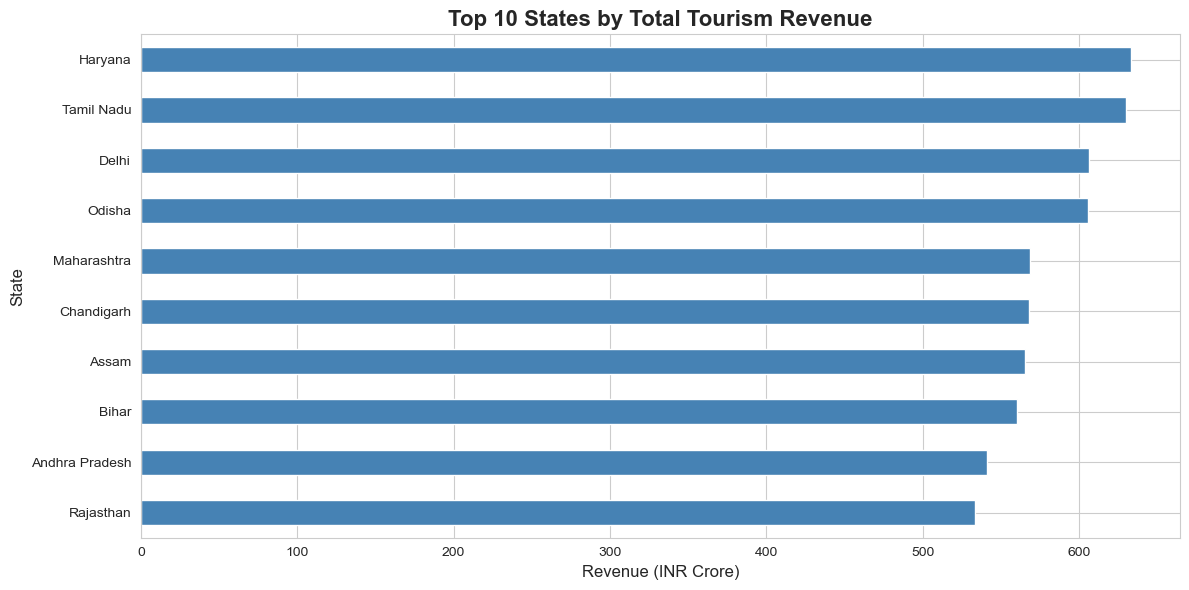

✅ Chart 1: Top 10 States by Revenue


In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (14, 6)

print("=" * 80)
print("GENERATING VISUALIZATIONS")
print("=" * 80)

# Plot 1: Top 10 States by Revenue
plt.figure(figsize=(12, 6))
revenue_by_state.head(10).sort_values().plot(kind='barh', color='steelblue')
plt.title('Top 10 States by Total Tourism Revenue', fontsize=16, fontweight='bold')
plt.xlabel('Revenue (INR Crore)', fontsize=12)
plt.ylabel('State', fontsize=12)
plt.tight_layout()
plt.show()

print("✅ Chart 1: Top 10 States by Revenue")


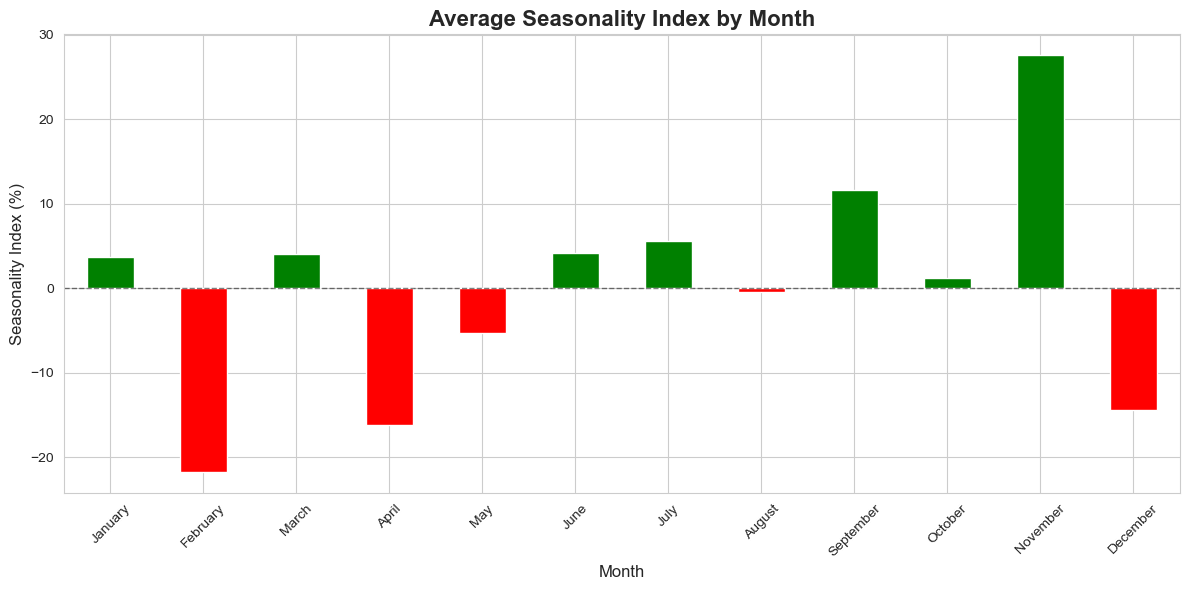

✅ Chart 2: Seasonality Index by Month


In [21]:
# Plot 2: Seasonality Index by Month
plt.figure(figsize=(12, 6))
seasonality_by_month.plot(kind='bar', color=['red' if x < 0 else 'green' for x in seasonality_by_month])
plt.title('Average Seasonality Index by Month', fontsize=16, fontweight='bold')
plt.xlabel('Month', fontsize=12)
plt.ylabel('Seasonality Index (%)', fontsize=12)
plt.axhline(y=0, color='black', linestyle='--', linewidth=1, alpha=0.5)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print("✅ Chart 2: Seasonality Index by Month")

In [22]:
print("\n" + "=" * 80)
print("✅ PROCESSING COMPLETE!")
print("=" * 80)

print(f"""
Summary:
--------
✅ Data Loaded: {len(df)} records
✅ Data Cleaned: Types validated, dates standardized, no missing values
✅ Features Engineered: 12 new features created
   1. Revenue Per Tourist (INR)
   2. Domestic Spend Per Person
   3. Foreign Spend Per Person
   4. Estimated Domestic Revenue
   5. Estimated Foreign Revenue
   6. Domestic Revenue Percentage
   7. Foreign Revenue Percentage
   8. Annual Average Revenue
   9. Seasonality Index
   10. Seasonality Ratio
   11. Month Number
   12. Standardised Date

   """)


✅ PROCESSING COMPLETE!

Summary:
--------
✅ Data Loaded: 432 records
✅ Data Cleaned: Types validated, dates standardized, no missing values
✅ Features Engineered: 12 new features created
   1. Revenue Per Tourist (INR)
   2. Domestic Spend Per Person
   3. Foreign Spend Per Person
   4. Estimated Domestic Revenue
   5. Estimated Foreign Revenue
   6. Domestic Revenue Percentage
   7. Foreign Revenue Percentage
   8. Annual Average Revenue
   9. Seasonality Index
   10. Seasonality Ratio
   11. Month Number
   12. Standardised Date

   


In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load your processed data
df = pd.read_csv('India_Tourism_2025_Processed.csv')

print("✅ Processed data loaded!")
print(f"Shape: {df.shape}")
print(f"Columns: {df.columns.tolist()}")

✅ Processed data loaded!
Shape: (432, 20)
Columns: ['State', 'Month', 'Date', 'Month_Number', 'Domestic Tourists', 'Foreign Tourists', 'Total Tourists', 'Tourism Revenue (INR Crore)', 'Revenue_Per_Tourist_INR', 'Domestic_Spend_Per_Person_Crore', 'Foreign_Spend_Per_Person_Crore', 'Est_Domestic_Revenue_Crore', 'Est_Foreign_Revenue_Crore', 'Domestic_Revenue_Percent', 'Foreign_Revenue_Percent', 'Annual_Avg_Revenue', 'Seasonality_Index', 'Seasonality_Ratio', 'Purpose of Visit', 'Growth % (Approx.)']


In [26]:
print("=" * 80)
print("KEY PERFORMANCE INDICATORS (KPIs)")
print("=" * 80)

# KPI 1: Overall Tourism Metrics
total_tourists = df['Total Tourists'].sum()
total_revenue = df['Tourism Revenue (INR Crore)'].sum()
avg_revenue_per_tourist = total_revenue * 10000000 / total_tourists

kpi_data = {
    'Metric': ['Total Tourists', 'Total Revenue (₹ Crore)', 'Revenue per Tourist (₹)', 
               'States', 'Peak Month', 'Off-Peak Month'],
    'Value': [
        f"{total_tourists:,}",
        f"₹{total_revenue:,.2f}",
        f"₹{avg_revenue_per_tourist:,.2f}",
        f"{df['State'].nunique()}",
        df.loc[df['Seasonality_Index'].idxmax(), 'Month'],
        df.loc[df['Seasonality_Index'].idxmin(), 'Month']
    ]
}

kpi_df = pd.DataFrame(kpi_data)
print(" "
 + kpi_df.to_string(index=False))

KEY PERFORMANCE INDICATORS (KPIs)
                  Metric         Value
         Total Tourists 1,115,127,695
Total Revenue (₹ Crore)    ₹17,077.28
Revenue per Tourist (₹)       ₹153.14
                 States            36
             Peak Month       January
         Off-Peak Month      February


In [29]:
print(" " + "=" * 80)
print("STATE PERFORMANCE RANKINGS")
print("=" * 80)

# Rank states by various metrics
state_metrics = df.groupby('State').agg({
    'Tourism Revenue (INR Crore)': 'sum',
    'Total Tourists': 'sum',
    'Domestic Tourists': 'sum',
    'Foreign Tourists': 'sum',
    'Revenue_Per_Tourist_INR': 'mean',
    'Domestic_Revenue_Percent': 'mean'
}).reset_index()

state_metrics.columns = ['State', 'Total_Revenue', 'Total_Tourists', 
                         'Domestic_Tourists', 'Foreign_Tourists', 
                         'Avg_RPT', 'Domestic_Revenue_Pct']

state_metrics = state_metrics.sort_values('Total_Revenue', ascending=False)

print("Top 10 States by Revenue:")
print(state_metrics.head(10)[['State', 'Total_Revenue', 'Total_Tourists', 'Avg_RPT']])

print("Top 10 States by Revenue Per Tourist (High Value):")
top_rpt = state_metrics.sort_values('Avg_RPT', ascending=False).head(10)
print(top_rpt[['State', 'Avg_RPT', 'Total_Tourists', 'Total_Revenue']])

print("Top 10 States by Tourist Volume:")
top_volume = state_metrics.sort_values('Total_Tourists', ascending=False).head(10)
print(top_volume[['State', 'Total_Tourists', 'Total_Revenue', 'Avg_RPT']])

STATE PERFORMANCE RANKINGS
Top 10 States by Revenue:
             State  Total_Revenue  Total_Tourists     Avg_RPT
11         Haryana         632.85        34204495  172.881372
30      Tamil Nadu         630.22        38143698  146.580105
8            Delhi         606.46        42857769  137.606628
25          Odisha         605.57        41590468  147.376258
20     Maharashtra         568.28        30762598  170.637002
5       Chandigarh         567.84        35417635  164.705758
3            Assam         565.38        33806602  165.055743
4            Bihar         560.50        34349558  158.759038
1   Andhra Pradesh         540.78        33969348  146.781739
28       Rajasthan         533.29        32008911  162.486433
Top 10 States by Revenue Per Tourist (High Value):
                State     Avg_RPT  Total_Tourists  Total_Revenue
2   Arunachal Pradesh  189.402233        28136250         468.41
33      Uttar Pradesh  180.919049        24342481         413.36
9                 G

In [30]:
print("" + "=" * 80)
print("SEASONAL PATTERNS ANALYSIS")
print("=" * 80)

# Monthly seasonality
monthly_data = df.groupby('Month').agg({
    'Tourism Revenue (INR Crore)': 'sum',
    'Total Tourists': 'sum',
    'Seasonality_Index': 'mean',
    'Foreign_Revenue_Percent': 'mean'
}).reset_index()

# Reorder by month
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']
monthly_data['Month'] = pd.Categorical(monthly_data['Month'], categories=month_order, ordered=True)
monthly_data = monthly_data.sort_values('Month')

print("Monthly Performance:")
print(monthly_data)

# Identify seasons
peak_months = monthly_data[monthly_data['Seasonality_Index'] > 10]
off_months = monthly_data[monthly_data['Seasonality_Index'] < -10]

print(f"Peak Season Months: {', '.join(peak_months['Month'].tolist())}")
print(f"Off-Season Months: {', '.join(off_months['Month'].tolist())}")

SEASONAL PATTERNS ANALYSIS
Monthly Performance:
        Month  Tourism Revenue (INR Crore)  Total Tourists  Seasonality_Index  \
4     January                      1486.72        98416175           3.715331   
3    February                      1105.56        67070591         -21.731871   
7       March                      1426.58        93180197           4.041281   
0       April                      1209.24        87559817         -16.104899   
8         May                      1326.78        90414370          -5.303421   
6        June                      1532.89        97659404           4.176881   
5        July                      1506.48        96703481           5.585890   
1      August                      1439.75        99471877          -0.432893   
11  September                      1593.00        96413518          11.656175   
10    October                      1434.45        97720796           1.186049   
9    November                      1806.17       111819178   

In [31]:
print("" + "=" * 80)
print("REVENUE MIX ANALYSIS")
print("=" * 80)

# Overall split
overall_domestic_pct = df['Domestic_Revenue_Percent'].mean()
overall_foreign_pct = df['Foreign_Revenue_Percent'].mean()

print(f"Overall Revenue Split:")
print(f"  Domestic: {overall_domestic_pct:.2f}%")
print(f"  Foreign: {overall_foreign_pct:.2f}%")

# By state
print("Top 10 States Most Dependent on Foreign Tourism:")
foreign_dependent = df.groupby('State')['Foreign_Revenue_Percent'].mean().sort_values(ascending=False).head(10)
for state, pct in foreign_dependent.items():
    print(f"  {state:<30} {pct:>6.2f}%")

print("Top 10 States Most Dependent on Domestic Tourism:")
domestic_dependent = df.groupby('State')['Domestic_Revenue_Percent'].mean().sort_values(ascending=False).head(10)
for state, pct in domestic_dependent.items():
    print(f"  {state:<30} {pct:>6.2f}%")

REVENUE MIX ANALYSIS
Overall Revenue Split:
  Domestic: 80.59%
  Foreign: 19.41%
Top 10 States Most Dependent on Foreign Tourism:
  Telangana                       37.68%
  West Bengal                     30.76%
  Manipur                         25.43%
  Karnataka                       24.49%
  Maharashtra                     24.44%
  Nagaland                        24.22%
  Puducherry                      23.42%
  Madhya Pradesh                  22.87%
  Goa                             21.94%
  Tripura                         21.60%
Top 10 States Most Dependent on Domestic Tourism:
  Odisha                          91.11%
  Rajasthan                       88.38%
  Delhi                           88.35%
  Haryana                         86.91%
  Chhattisgarh                    85.51%
  Daman & Diu                     85.31%
  Meghalaya                       84.40%
  Andaman & Nicobar Islands       84.00%
  Assam                           83.76%
  Uttar Pradesh                   83.75%


In [32]:
print("" + "=" * 80)
print("TOURISM PURPOSE ANALYSIS")
print("=" * 80)

# Revenue by purpose
purpose_revenue = df.groupby('Purpose of Visit').agg({
    'Tourism Revenue (INR Crore)': 'sum',
    'Total Tourists': 'sum',
    'Revenue_Per_Tourist_INR': 'mean'
}).reset_index()

purpose_revenue = purpose_revenue.sort_values('Tourism Revenue (INR Crore)', ascending=False)

print("Revenue by Purpose of Visit:")
print(purpose_revenue)

TOURISM PURPOSE ANALYSIS
Revenue by Purpose of Visit:
  Purpose of Visit  Tourism Revenue (INR Crore)  Total Tourists  \
1         Business                      4494.13       278319679   
2          Leisure                      3263.87       212725840   
0        Adventure                      3220.93       220954937   
3          Medical                      3168.77       211262487   
4        Religious                      2929.58       191864752   

   Revenue_Per_Tourist_INR  
1               158.174859  
2               158.354713  
0               149.090352  
3               153.719861  
4               150.162194  


In [33]:
# Create aggregated datasets for dashboard

# 1. State-level summary
state_summary = df.groupby('State').agg({
    'Tourism Revenue (INR Crore)': 'sum',
    'Total Tourists': 'sum',
    'Domestic Tourists': 'sum',
    'Foreign Tourists': 'sum',
    'Domestic_Revenue_Percent': 'mean',
    'Revenue_Per_Tourist_INR': 'mean',
    'Seasonality_Index': 'mean'
}).reset_index()

state_summary.columns = ['State', 'Total_Revenue', 'Total_Tourists', 'Domestic_Tourists',
                         'Foreign_Tourists', 'Domestic_Revenue_Pct', 'Avg_RPT', 'Avg_Seasonality']

state_summary = state_summary.sort_values('Total_Revenue', ascending=False)

# 2. Monthly summary
monthly_summary = df.groupby('Month').agg({
    'Tourism Revenue (INR Crore)': 'sum',
    'Total Tourists': 'sum',
    'Foreign_Revenue_Percent': 'mean',
    'Seasonality_Index': 'mean'
}).reset_index()

monthly_summary['Month_Num'] = monthly_summary['Month'].map(month_mapping)
monthly_summary = monthly_summary.sort_values('Month_Num')

# 3. State-Month combination for detailed analysis
state_month_detail = df[['State', 'Month', 'Date', 'Total Tourists', 
                         'Tourism Revenue (INR Crore)', 'Domestic_Revenue_Percent',
                         'Seasonality_Index', 'Revenue_Per_Tourist_INR']]

# Save aggregated data
state_summary.to_csv('Dashboard_State_Summary.csv', index=False)
monthly_summary.to_csv('Dashboard_Monthly_Summary.csv', index=False)
state_month_detail.to_csv('Dashboard_Detail_Data.csv', index=False)

print("✅ Aggregated datasets created and saved:")
print("   • Dashboard_State_Summary.csv")
print("   • Dashboard_Monthly_Summary.csv")
print("   • Dashboard_Detail_Data.csv")

✅ Aggregated datasets created and saved:
   • Dashboard_State_Summary.csv
   • Dashboard_Monthly_Summary.csv
   • Dashboard_Detail_Data.csv


In [34]:
print("" + "=" * 80)
print("GROWTH ANALYSIS")
print("=" * 80)

# Average growth by state
growth_by_state = df.groupby('State')['Growth % (Approx.)'].mean().sort_values(ascending=False)

print("Top 10 States by Growth Rate:")
for i, (state, growth) in enumerate(growth_by_state.head(10).items(), 1):
    print(f"  {i}. {state:<30} {growth:>7.2f}%")

print("Bottom 10 States by Growth Rate:")
for i, (state, growth) in enumerate(growth_by_state.tail(10).items(), 1):
    print(f"  {i}. {state:<30} {growth:>7.2f}%")

# Average growth by purpose
growth_by_purpose = df.groupby('Purpose of Visit')['Growth % (Approx.)'].mean().sort_values(ascending=False)
print("Average Growth by Purpose:")
print(growth_by_purpose)

GROWTH ANALYSIS
Top 10 States by Growth Rate:
  1. Manipur                           7.55%
  2. Madhya Pradesh                    6.77%
  3. Chhattisgarh                      6.56%
  4. Assam                             6.32%
  5. Sikkim                            6.27%
  6. Delhi                             6.07%
  7. Jharkhand                         5.67%
  8. Lakshadweep                       5.59%
  9. Jammu & Kashmir                   5.42%
  10. West Bengal                       5.36%
Bottom 10 States by Growth Rate:
  1. Goa                               3.36%
  2. Arunachal Pradesh                 3.11%
  3. Chandigarh                        3.04%
  4. Andaman & Nicobar Islands         2.95%
  5. Karnataka                         2.90%
  6. Maharashtra                       2.71%
  7. Mizoram                           2.48%
  8. Punjab                            2.05%
  9. Rajasthan                         1.42%
  10. Uttarakhand                       1.26%
Average Growth by P

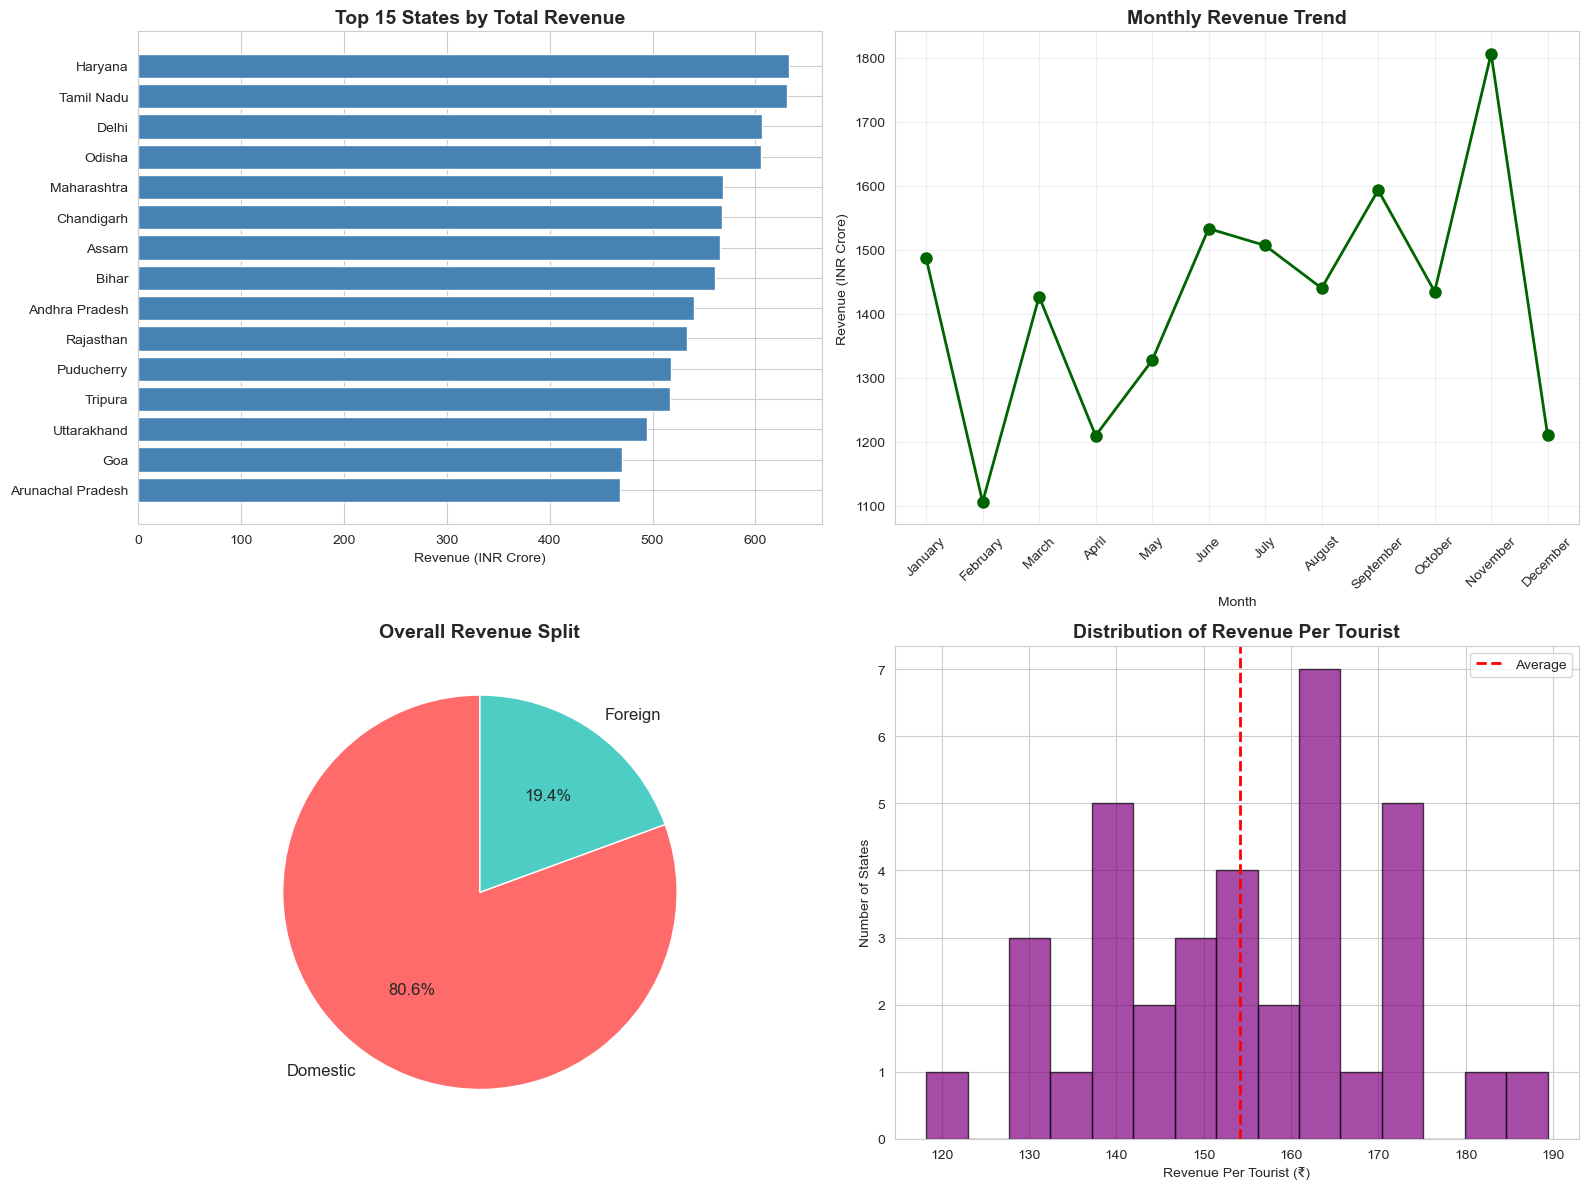

✅ Saved: Dashboard_Revenue_Analysis.png


In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (16, 10)

# Create figure with subplots
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Top 15 States by Revenue
top_states = state_summary.head(15)
axes[0, 0].barh(range(len(top_states)), top_states['Total_Revenue'], color='steelblue')
axes[0, 0].set_yticks(range(len(top_states)))
axes[0, 0].set_yticklabels(top_states['State'])
axes[0, 0].set_xlabel('Revenue (INR Crore)')
axes[0, 0].set_title('Top 15 States by Total Revenue', fontweight='bold', fontsize=14)
axes[0, 0].invert_yaxis()

# 2. Monthly Revenue Trend
axes[0, 1].plot(monthly_summary['Month'], monthly_summary['Tourism Revenue (INR Crore)'],
                marker='o', linewidth=2, markersize=8, color='darkgreen')
axes[0, 1].set_xlabel('Month')
axes[0, 1].set_ylabel('Revenue (INR Crore)')
axes[0, 1].set_title('Monthly Revenue Trend', fontweight='bold', fontsize=14)
axes[0, 1].tick_params(axis='x', rotation=45)
axes[0, 1].grid(True, alpha=0.3)

# 3. Domestic vs Foreign Revenue Split
split_data = [overall_domestic_pct, overall_foreign_pct]
colors = ['#FF6B6B', '#4ECDC4']
axes[1, 0].pie(split_data, labels=['Domestic', 'Foreign'], autopct='%1.1f%%',
               colors=colors, startangle=90, textprops={'fontsize': 12})
axes[1, 0].set_title('Overall Revenue Split', fontweight='bold', fontsize=14)

# 4. Revenue Per Tourist Distribution
axes[1, 1].hist(state_summary['Avg_RPT'], bins=15, color='purple', alpha=0.7, edgecolor='black')
axes[1, 1].set_xlabel('Revenue Per Tourist (₹)')
axes[1, 1].set_ylabel('Number of States')
axes[1, 1].set_title('Distribution of Revenue Per Tourist', fontweight='bold', fontsize=14)
axes[1, 1].axvline(state_summary['Avg_RPT'].mean(), color='red', linestyle='--', linewidth=2, label='Average')
axes[1, 1].legend()

plt.tight_layout()
plt.savefig('Dashboard_Revenue_Analysis.png', dpi=300, bbox_inches='tight')
plt.show()

print("✅ Saved: Dashboard_Revenue_Analysis.png")

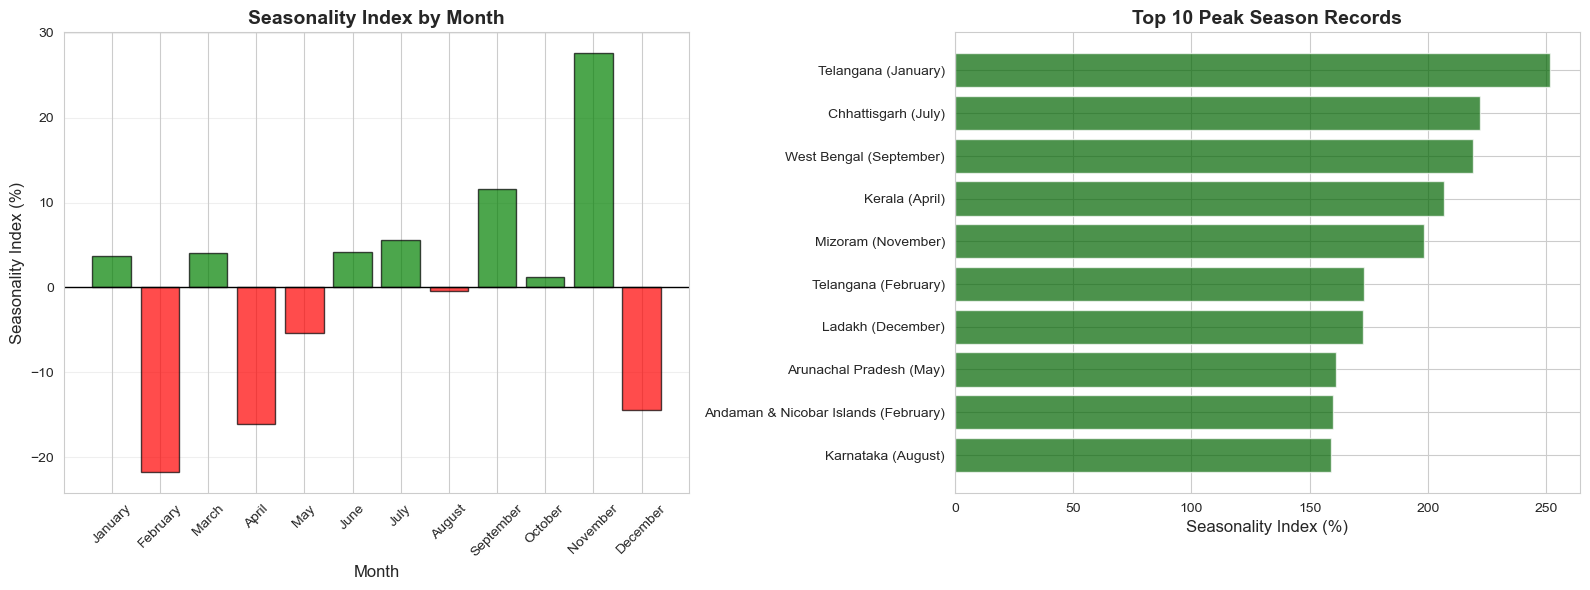

✅ Saved: Dashboard_Seasonality_Analysis.png


In [37]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# 1. Seasonality Index by Month (left plot)
colors = ['red' if x < 0 else 'green' for x in monthly_summary['Seasonality_Index']]

axes[0].bar(
    monthly_summary['Month'],
    monthly_summary['Seasonality_Index'],
    color=colors,
    alpha=0.7,
    edgecolor='black'
)
axes[0].axhline(y=0, color='black', linestyle='-', linewidth=1)
axes[0].set_xlabel('Month', fontsize=12)
axes[0].set_ylabel('Seasonality Index (%)', fontsize=12)
axes[0].set_title('Seasonality Index by Month', fontweight='bold', fontsize=14)
axes[0].tick_params(axis='x', rotation=45)
axes[0].grid(True, alpha=0.3, axis='y')

# 2. Top 10 States Peak Seasons (right plot)
top_seasonal = df.nlargest(10, 'Seasonality_Index')[['State', 'Month', 'Seasonality_Index']]

axes[1].barh(
    range(len(top_seasonal)),
    top_seasonal['Seasonality_Index'],
    color='darkgreen',
    alpha=0.7
)
axes[1].set_yticks(range(len(top_seasonal)))
axes[1].set_yticklabels(
    [f"{row['State']} ({row['Month']})" for _, row in top_seasonal.iterrows()]
)
axes[1].set_xlabel('Seasonality Index (%)', fontsize=12)
axes[1].set_title('Top 10 Peak Season Records', fontweight='bold', fontsize=14)
axes[1].invert_yaxis()

plt.tight_layout()
plt.savefig('Dashboard_Seasonality_Analysis.png', dpi=300, bbox_inches='tight')
plt.show()

print("✅ Saved: Dashboard_Seasonality_Analysis.png")

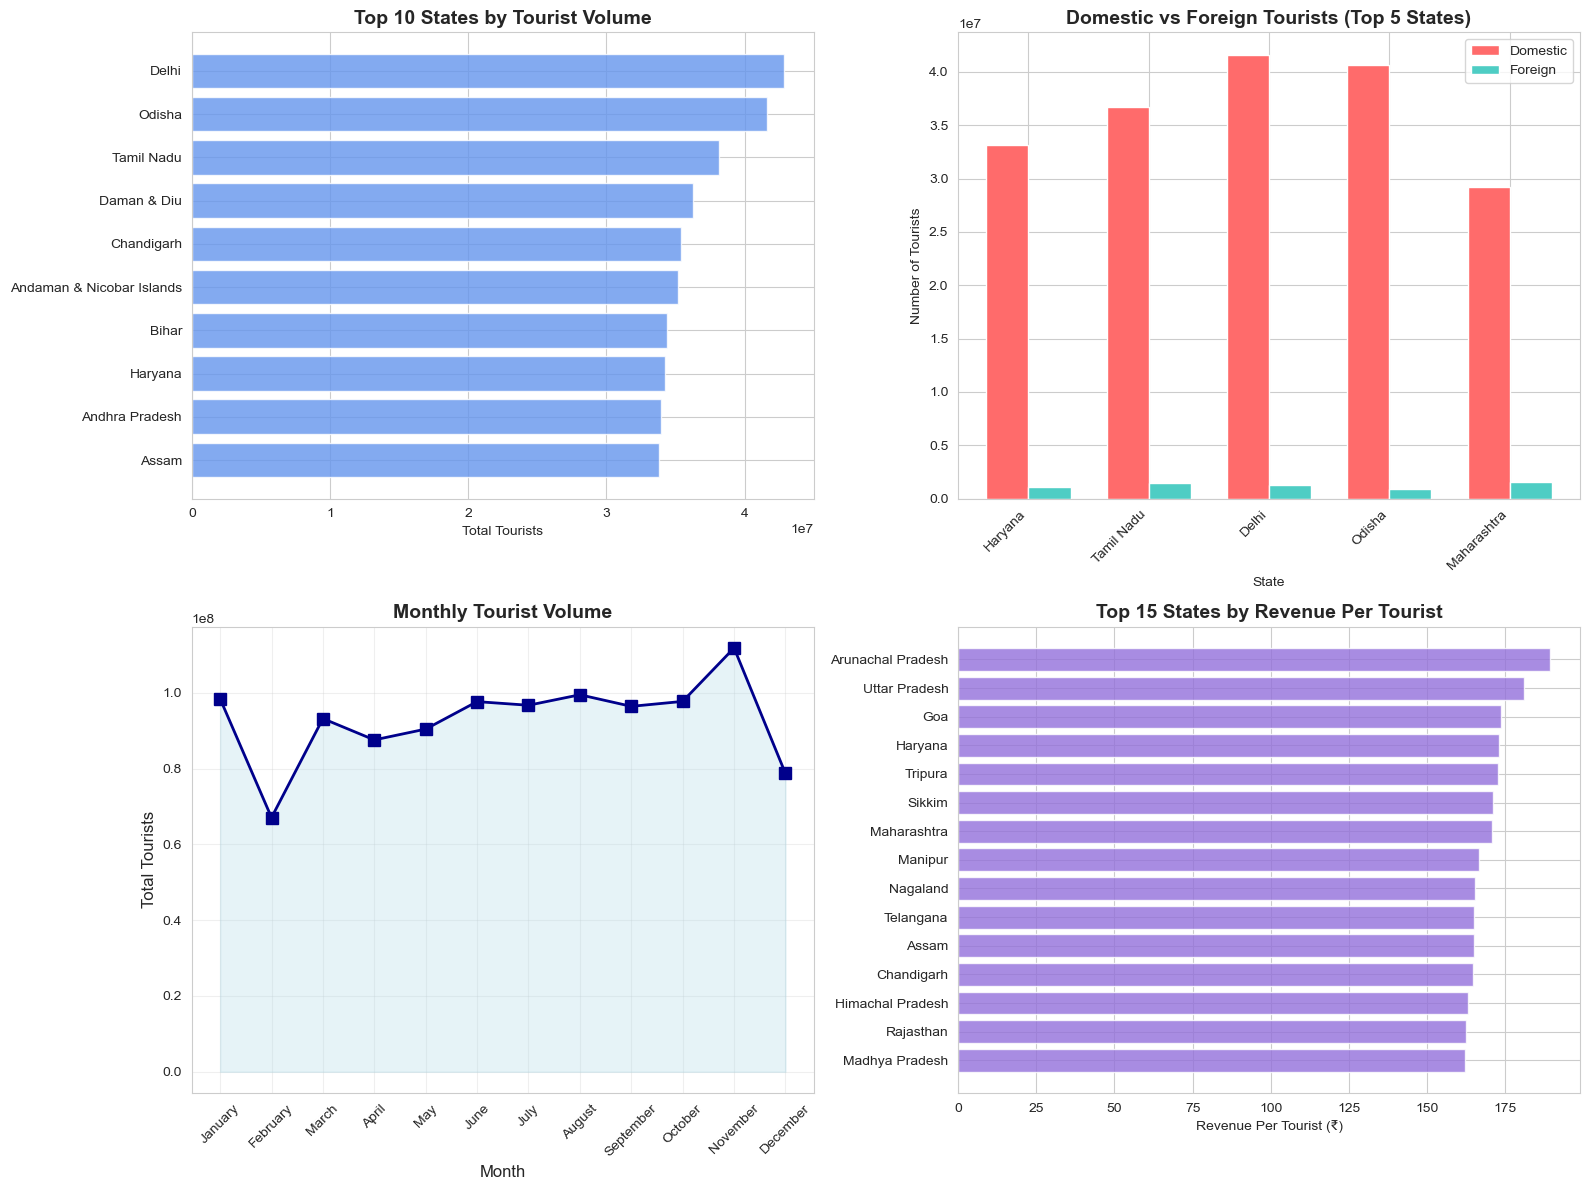

✅ Saved: Dashboard_Tourist_Analysis.png


In [38]:
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Top 10 States by Tourist Volume
top_volume_states = state_summary.nlargest(10, 'Total_Tourists')
axes[0, 0].barh(range(len(top_volume_states)), top_volume_states['Total_Tourists'], 
                color='cornflowerblue', alpha=0.8)
axes[0, 0].set_yticks(range(len(top_volume_states)))
axes[0, 0].set_yticklabels(top_volume_states['State'])
axes[0, 0].set_xlabel('Total Tourists')
axes[0, 0].set_title('Top 10 States by Tourist Volume', fontweight='bold', fontsize=14)
axes[0, 0].invert_yaxis()

# 2. Domestic vs Foreign Tourist Split by Top States
top_5 = state_summary.head(5)
x = range(len(top_5))
width = 0.35
axes[0, 1].bar([i - width/2 for i in x], top_5['Domestic_Tourists'], width, label='Domestic', color='#FF6B6B')
axes[0, 1].bar([i + width/2 for i in x], top_5['Foreign_Tourists'], width, label='Foreign', color='#4ECDC4')
axes[0, 1].set_xlabel('State')
axes[0, 1].set_ylabel('Number of Tourists')
axes[0, 1].set_title('Domestic vs Foreign Tourists (Top 5 States)', fontweight='bold', fontsize=14)
axes[0, 1].set_xticks(x)
axes[0, 1].set_xticklabels(top_5['State'], rotation=45, ha='right')
axes[0, 1].legend()

# 3. Monthly Tourist Trends
axes[1, 0].plot(monthly_summary['Month'], monthly_summary['Total Tourists'],
                marker='s', linewidth=2, markersize=8, color='darkblue', label='Total')
axes[1, 0].fill_between(range(len(monthly_summary)), monthly_summary['Total Tourists'], alpha=0.3, color='lightblue')
axes[1, 0].set_xlabel('Month', fontsize=12)
axes[1, 0].set_ylabel('Total Tourists', fontsize=12)
axes[1, 0].set_title('Monthly Tourist Volume', fontweight='bold', fontsize=14)
axes[1, 0].tick_params(axis='x', rotation=45)
axes[1, 0].grid(True, alpha=0.3)

# 4. Revenue Per Tourist by Top 15 States
top_15_rpt = state_summary.nlargest(15, 'Avg_RPT')
axes[1, 1].barh(range(len(top_15_rpt)), top_15_rpt['Avg_RPT'], color='mediumpurple', alpha=0.8)
axes[1, 1].set_yticks(range(len(top_15_rpt)))
axes[1, 1].set_yticklabels(top_15_rpt['State'])
axes[1, 1].set_xlabel('Revenue Per Tourist (₹)')
axes[1, 1].set_title('Top 15 States by Revenue Per Tourist', fontweight='bold', fontsize=14)
axes[1, 1].invert_yaxis()

plt.tight_layout()
plt.savefig('Dashboard_Tourist_Analysis.png', dpi=300, bbox_inches='tight')
plt.show()

print("✅ Saved: Dashboard_Tourist_Analysis.png")